In [ ]:
pip install pygad

In [ ]:
pip install haversine

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import pygad
from haversine import haversine

pop = '/content/drive/My Drive/Colab Notebooks/GeneticRedistricting/countypoparea.csv'
df1 = pd.read_csv(pop)
poparea = df1[['population', 'area(km)']].to_numpy() # This is the array of populations and area
print(df1)
print(poparea)


FileNotFoundError: ignored

In [3]:
cent = '/content/drive/My Drive/Colab Notebooks/GeneticRedistricting/centroids.csv'
df2 = pd.read_csv(cent)
centroids = df2[['x', 'y']].to_numpy() # This is the array of centroids
print(df2)
print(centroids)

NameError: ignored

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
nmatrix = '/content/drive/My Drive/Colab Notebooks/GeneticRedistricting/neighbormatrix_alphebatized.csv'
df3 = pd.read_csv(nmatrix)
neighbormatrix = df3.drop(df3.columns[0], axis=1).to_numpy() # This is the array of neighbor matrix
# neighbormatrix = df3.to_numpy()
print(df3)
print(neighbormatrix)

NameError: ignored

In [ ]:
state_population = 9958995
num_of_districts = 14

def reock(disList):
    longest_distance = 0

    if len(disList) > 1:
        for dist1 in disList:
            for dist2 in disList:
                if haversine(centroids[dist1], centroids[dist2]) > longest_distance:

                    longest_distance = haversine(centroids[dist1], centroids[dist2])

    else:
        longest_distance = np.sqrt(poparea[disList[0]][1] / np.pi) * 2

    radius = longest_distance / 2
    circle_area = (radius**2) * np.pi

    district_area = 0

    for district in disList:
        district_area += poparea[district][1]

    score = district_area / circle_area
    return score * 100

def equal_pop(disList):
    district_pop = 0
    target_population = state_population / num_of_districts

    for district in disList:
        district_pop += poparea[district][0]

    pop_diff = np.absolute(target_population - district_pop)
    pop_diff = (pop_diff / target_population) * 100
    score = 100 - (pop_diff**2)
    return score

def contiguity_check(disList):
    noncontig_count = 0
    is_contig = False

    for idx, x in np.ndenumerate(neighbormatrix):
        # print(idx, x)
        if x == 1:
          is_contig = True
        if not is_contig:
          noncontig_count += 1
        is_contig = False
    
    # for x in disList:
    #     for y in disList:
    #         if neighbormatrix[x][y] == 1:
    #             is_contig = True
    #     if not is_contig:
    #         noncontig_count += 1
    #     is_contig = False

    # print(is_contig)

    # print(noncontig_count)
    return noncontig_count * -50

def fitness_func(solution, solution_idx):
    district1 = []
    district2 = []
    district3 = []
    district4 = []
    district5 = []
    district6 = []
    district7 = []
    district8 = []
    district9 = []
    district10 = []
    district11 = []
    district12 = []
    district13 = []
    district14 = []
    districts_list = [district1, district2, district3, district4, district5, district6, district7, district8, district9, district10, district11, district12, district13, district14]
    fitness = 0
    
    print(chromosome)
    print(len(chromosome))
    for allele in range(len(chromosome)):
        if(chromosome[allele] == 1):
            district1.append(allele)
        if (chromosome[allele] == 2):
            district2.append(allele)
        if (chromosome[allele] == 3):
            district3.append(allele)
        if (chromosome[allele] == 4):
            district4.append(allele)
        if (chromosome[allele] == 5):
            district5.append(allele)
        if (chromosome[allele] == 6):
            district6.append(allele)
        if (chromosome[allele] == 7):
            district7.append(allele)
        if (chromosome[allele] == 8):
            district8.append(allele)
        if (chromosome[allele] == 9):
            district9.append(allele)
        if (chromosome[allele] == 10):
            district10.append(allele)
        if (chromosome[allele] == 11):
            district11.append(allele)
        if (chromosome[allele] == 12):
            district12.append(allele)
        if (chromosome[allele] == 13):
            district13.append(allele)
        if (chromosome[allele] == 14):
            district14.append(allele)

    count = 1
    for district in districts_list:
        district_score = 0
        district_score += reock(district)
        district_score += equal_pop(district)
        district_score += contiguity_check(district)
        fitness += district_score
        print()
        print("District", count, ": ", district)
        print("Size of the District: ", len(district))
        count = count+1

    return fitness

Streaming output truncated to the last 5000 lines.
  9  4  5 10  3  5  7  9 14  8 13  5 11  6  1 11  2  3  5 11  9  6  1  7
 11  6  4  7 11 14  4  6  2  3 12  5  6 13 14  7  5  1  8  7 13  7 12 10
 12  7  1  3  6  3 14  1  9  3 10 13  4  3 13  1 14  6  6 12  8  7 11  2
  9  5  7 12  4 10 12  6  2  2  3  3  7  4 14 14  8  9  7 10  4 11  9  6
 12  2  3  5  4 12  3 14  8 13  2 14  9 11 14  4 12  5 11  7  6  6 12 12
 10 10  5  6  7  2  8  9  8  5 11  5  7  5  3  4  2  1 13]
163

District 1 :  [38, 46, 65, 74, 79, 87, 161]
Size of the District:  7

District 2 :  [40, 56, 95, 104, 105, 121, 130, 149, 160]
Size of the District:  9

District 3 :  [1, 3, 28, 41, 57, 75, 77, 81, 85, 106, 107, 122, 126, 158]
Size of the District:  14

District 4 :  [25, 50, 54, 84, 100, 109, 116, 124, 135, 159]
Size of the District:  10

District 5 :  [26, 29, 35, 42, 59, 64, 97, 123, 137, 146, 153, 155, 157]
Size of the District:  13

District 6 :  [7, 19, 20, 37, 45, 49, 55, 60, 76, 89, 90, 103, 119, 140, 141, 

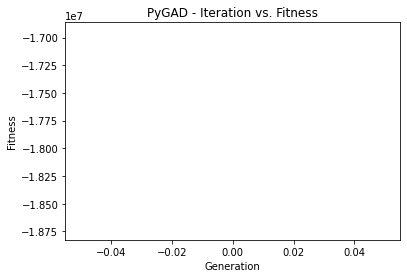

[10  3 13  3 12 11 10  6  9 13  8 11 14 12 11 11 12 12 11  6  6  9  8 14
  9  4  5 10  3  5  7  9 14  8 13  5 11  6  1 11  2  3  5 11  9  6  1  7
 11  6  4  7 11 14  4  6  2  3 12  5  6 13 14  7  5  1  8  7 13  7 12 10
 12  7  1  3  6  3 14  1  9  3 10 13  4  3 13  1 14  6  6 12  8  7 11  2
  9  5  7 12  4 10 12  6  2  2  3  3  7  4 14 14  8  9  7 10  4 11  9  6
 12  2  3  5  4 12  3 14  8 13  2 14  9 11 14  4 12  5 11  7  6  6 12 12
 10 10  5  6  7  2  8  9  8  5 11  5  7  5  3  4  2  1 13]
163

District 1 :  [38, 46, 65, 74, 79, 87, 161]
Size of the District:  7

District 2 :  [40, 56, 95, 104, 105, 121, 130, 149, 160]
Size of the District:  9

District 3 :  [1, 3, 28, 41, 57, 75, 77, 81, 85, 106, 107, 122, 126, 158]
Size of the District:  14

District 4 :  [25, 50, 54, 84, 100, 109, 116, 124, 135, 159]
Size of the District:  10

District 5 :  [26, 29, 35, 42, 59, 64, 97, 123, 137, 146, 153, 155, 157]
Size of the District:  13

District 6 :  [7, 19, 20, 37, 45, 49, 55, 60, 76, 89, 90

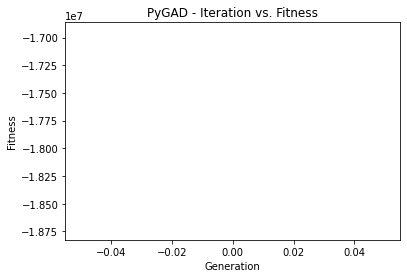

In [ ]:
fitness_function = fitness_func

num_generations = 1 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
sol_per_pop = 50 # Number of solutions in the population.
# num_genes = len(function_inputs)
num_genes = 163

init_range_low = 1
init_range_high = 15

parent_selection_type = "sss" # Type of parent selection.
keep_parents = 7 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

crossover_type = "single_point" # Type of the crossover operator.

# Parameters of the mutation operation.
mutation_type = "scramble" # Type of the mutation operator.
mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists or when mutation_type is None.

last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       gene_type=int,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       on_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# After the generations complete, some plots are showed that summarize the how the outputs/fitenss values evolve over generations.
ga_instance.plot_result()

# Returning the details of the best solution.
# solution, solution_fitness, solution_idx = ga_instance.best_solution()
# print("Parameters of the best solution : {solution}".format(solution=solution))
# print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
# print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# prediction = np.sum(np.array(function_inputs)*solution)
# print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

prediction = np.sum(np.array(chromosome)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_result()